In [70]:
import pandas as pd

In [71]:
dataenc = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_autoencoder.xlsx")
databaiges = pd.read_csv("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_with_deterioration_index.csv")

In [72]:
dataenc.shape

(292, 45)

In [73]:
databaiges.shape

(292, 23)

In [74]:
dataenc2 = dataenc.drop(columns = ['Jan_2022', "Feb_2022", "Mar_2022", "Apr_2022", "May_2022", "Jun_2022", "Jul_2022", "Aug_2022", "Sep_2022", "Oct_2022", "Nov_2022", "Dec_2022", 'Jan_2023', "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023", "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"])

In [75]:
databaiges2 = databaiges.drop(columns=["data_darrera_entrada", "data_darrera_sortida"])

In [76]:
merged_data = dataenc2.merge(databaiges2, on="material")

In [77]:
merged_data.columns

Index(['material', 'unitats_2022_x', 'vendes_2022_x',
       'preu_venda_unitari_2022_x', 'unitats_2023_x', 'vendes_2023_x',
       'preu_venda_unitari_2023_x', 'variacio_preu_venda_unitari_2022_2023_x',
       'proporcio_variacio_preu_venda_unitari_2022_2023_x',
       'data_darrera_entrada', 'dies_ultima_entrada_x', 'data_darrera_sortida',
       'dies_ultima_sortida_x', 'diferencia_entrada_sortida_x',
       'stock_final_2023_x', 'valor_total_stock_2023_x',
       'cost_unitari_stock_2023_x', 'forecast_index', 'cost_valor',
       'proporcio_vendes_stock', 'autoencoder_index', 'unitats_2022_y',
       'vendes_2022_y', 'preu_venda_unitari_2022_y', 'unitats_2023_y',
       'vendes_2023_y', 'preu_venda_unitari_2023_y',
       'variacio_preu_venda_unitari_2022_2023_y',
       'proporcio_variacio_preu_venda_unitari_2022_2023_y',
       'dies_ultima_entrada_y', 'dies_ultima_sortida_y',
       'diferencia_entrada_sortida_y', 'stock_final_2023_y',
       'valor_total_stock_2023_y', 'cost_un

In [78]:
merged_data["indice_deterioro"] = [ i if i != float("-inf") else -2 for i in merged_data["indice_deterioro"] ]

In [79]:
min(merged_data["indice_deterioro"])

-299.2451572558914

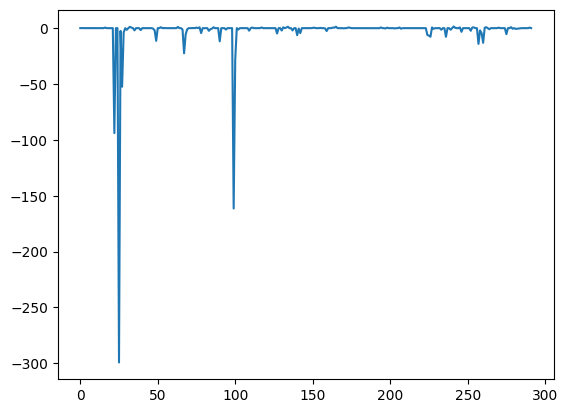

In [80]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])

In [81]:
merged_data["indice_deterioro"] = [i if i > 0 else 0 for i in merged_data["indice_deterioro"] ]

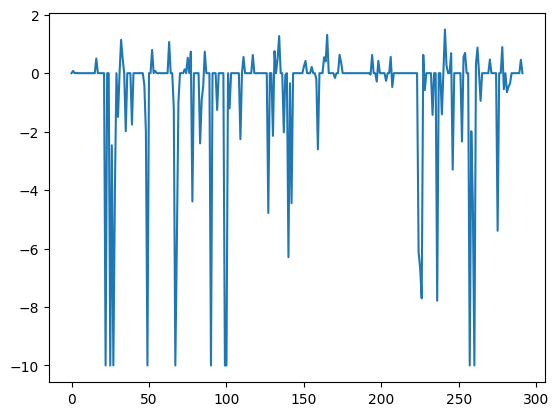

In [82]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data["indice_deterioro"] = scaler.fit_transform([[i] for i in merged_data["indice_deterioro"]])

In [84]:
print(max(merged_data["indice_deterioro"]))
print(max(merged_data["autoencoder_index"]))
print(max(merged_data["forecast_index"]))

0.9999999999999999
1.0
1.0


In [85]:
merged_data.at[241, "autoencoder_index"] = 1
merged_data.at[131, "autoencoder_index"] = 0.8

In [86]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data["autoencoder_index"] = scaler.fit_transform([[i] for i in merged_data["autoencoder_index"]])

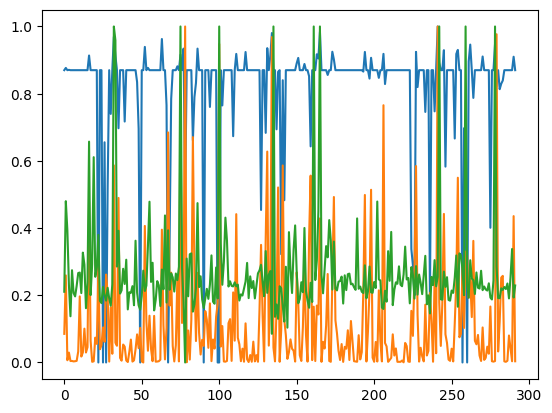

In [87]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])
plt.plot(merged_data["autoencoder_index"])
plt.plot(merged_data["forecast_index"])

print(merged_data[["indice_deterioro", "forecast_index", "autoencoder_index"]].head(100))

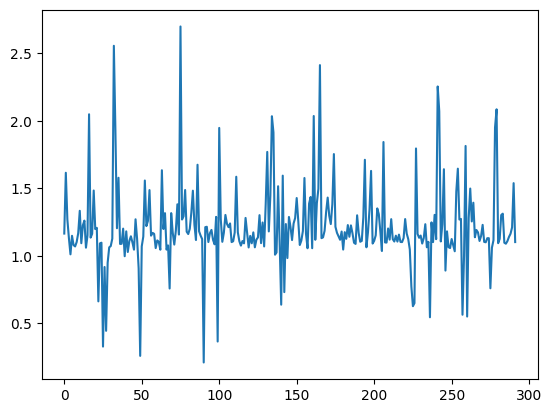

In [88]:
plt.plot(merged_data["forecast_index"] + merged_data["indice_deterioro"] + merged_data["autoencoder_index"])

In [89]:
merged_data["sum_indexs"]= merged_data["forecast_index"] + merged_data["indice_deterioro"] + merged_data["autoencoder_index"]

In [90]:
merged_data[merged_data["sum_indexs"] == max(merged_data["sum_indexs"])]

,material,unitats_2022_x,vendes_2022_x,preu_venda_unitari_2022_x,unitats_2023_x,vendes_2023_x,preu_venda_unitari_2023_x,variacio_preu_venda_unitari_2022_2023_x,proporcio_variacio_preu_venda_unitari_2022_2023_x,data_darrera_entrada,...,stock_final_2023_y,valor_total_stock_2023_y,cost_unitari_stock_2023_y,delta_unitats,delta_preu_venda_unitari,rotacion_inventario,inactividad,indice_deterioro,deterioro,sum_indexs
75,136170180,66000,10125.94,0.153423,33000,4474.47,0.13559,-0.017833,-0.116236,1970-01-01 01:00:44.950,...,11000.0,1372.17,0.124743,-0.499992,-0.109124,2.999727,529.0,0.915754,True,2.698834
